<h1><b><i><center>Ψηφιακή Επεξεργασία Σημάτων<br>Εργαστηριακό Project2</center></i></b></h1>
    

* <b> Ιάσων Χατζηθεοδώρου </b> ΑΜ = <b> 03117089 </b>
* <b> Ανδρέας Βεζάκης </b> ΑΜ = <b> 03117186 </b>
    

In [152]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa.output as lb
import librosa as lb
import pywt
import scipy as sc
import math
import random
import statistics

<h1><b><i><center>Μέρος 1ο - Υπολογισμός Ενέργειας Βραχέος Χρόνου και Μετ/σμού FourierΒραχέος Χρόνου (STFT) σε σήματα κίνησης και καρδιακού ρυθμού</center></i></b><h1>
    <b>1.1:</b>

In [43]:
npzfile = np.load('signals/step_00.npz')
npzfile.files

['acc', 'gyr', 'hrm']

In [62]:
def plot_array(array):
    plt1 = []
    plt2 = []
    plt3 = []
    plt.figure(figsize=(10,10))
    
    for i in range(len(array)):
        plt1.append(array[i][0])
        
    for i in range(len(array)):
        plt2.append(array[i][1])
        
    for i in range(len(array)):
        plt3.append(array[i][2])
        
    plt.subplot(311)
    plt.title('X axis')
    plt.plot(plt1)
    plt.show
    plt.subplot(312)
    plt.title('Y axis')
    plt.plot(plt2)
    plt.show
    plt.subplot(313)
    plt.title('Z axis')
    plt.plot(plt3)
    plt.show

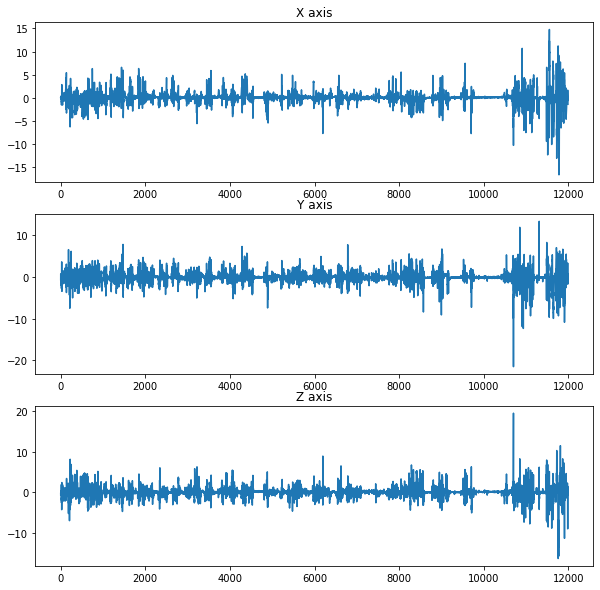

In [63]:
acc = npzfile['acc']            # f δειγματοληψιας = 20Hz, αντιστοιχει στη γραμμικη επιταχυνση
                                # (m/s2) που μετράει το επιταχυνσιόμετρο σε τρεις άξονεςX,Y,καιZ
n = np.linspace(0,11991,11992)  #(start,stop,num of samples)
plot_array(acc)

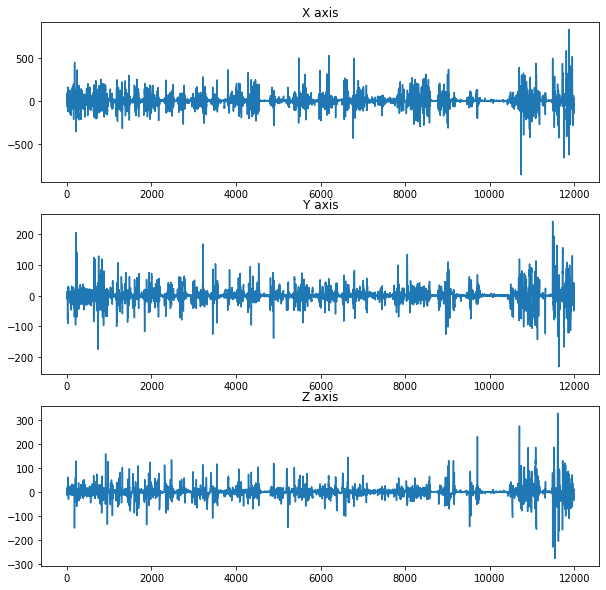

In [64]:
gyr = npzfile['gyr'] # f δειγματοληψιας = 20Hz, αντιστοιχεί στηγωνιακή ταχύτητα (◦/s) 
                     # που μετράει το γυροσκόπιο σε τρεις άξονες X,Y, και Z
plot_array(gyr)

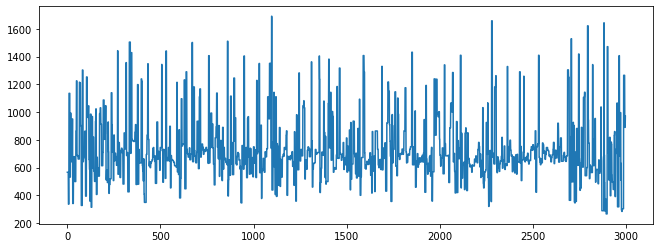

In [61]:
hrm = npzfile['hrm']# περιέχει την μεταβλητότητα καρδιακών παλμών(heart rate variability)
                    # χρονικών διαστημάτων (σεms) που μεσολαβούν από τον ένα χτύπο της καρδιάς έωςτον επόμενο. 
                    #Το σήμα έχει υποστεί επιπλέον επεξεργασία έτσι ώστε να έχει συχνότηταδειγματοληψίας 5 Hz
plt.figure(figsize=(11,4))
plt.plot(hrm)
plt.show()

# <b>1.2:</b>

In [48]:
def ste(sig,freq):
    len_window = 20*freq
    w = np.hamming(len_window)
    signal_sq = [i**2 for i in sig]
    E = np.convolve(w, signal_sq, mode='same')
    return E
tacc_gyr=np.linspace(0,600,11992)
thrm=np.linspace(0,600,2998)

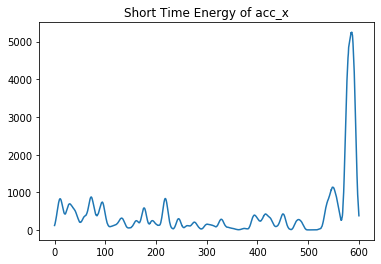

In [65]:
acc_0 = []
for i in range(len(acc)):
    acc_0.append(acc[i][0])
E = ste(acc_0,20)
plt.title('Short Time Energy of acc_x')
plt.plot(tacc_gyr,E)
plt.show()

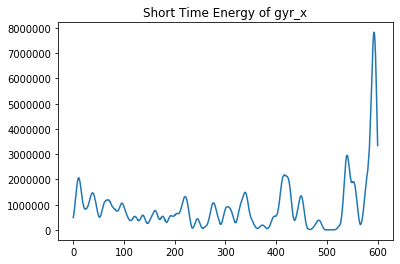

In [66]:
gyr_0 = []
for i in range(len(gyr)):
    gyr_0.append(gyr[i][0])
    

E = ste(gyr_0,20)
plt.title('Short Time Energy of gyr_x')
plt.plot(tacc_gyr,E)
plt.show()

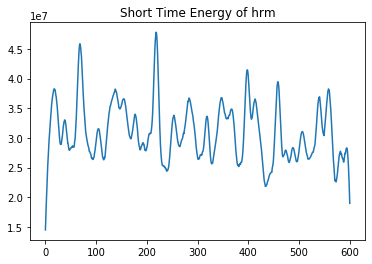

In [67]:
E = ste(hrm,5)
plt.title('Short Time Energy of hrm')
plt.plot(thrm,E)
plt.show()

# <b>1.3:</b>

* To φασματογράφημα για το acc_x

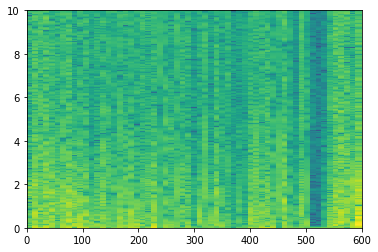

In [11]:
STFT1 = lb.core.stft(np.array(acc_0),2048,200,400)
b = np.shape(STFT1)  
t = np.linspace(0,600,b[1])
f = np.linspace(0,10,b[0])
plt.pcolormesh(t,f,np.log(np.abs(STFT1)))
plt.show()

* To φασματογράφημα για το hrm

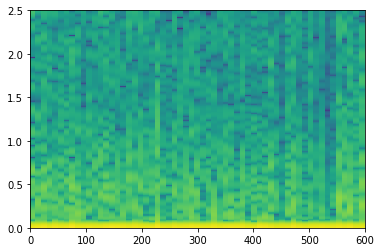

In [12]:
STFT2 = lb.core.stft(np.array(hrm),2048,50,100)
b = np.shape(STFT2) 
t = np.linspace(0,600,b[1])
f = np.linspace(0,2.5,b[0])
plt.pcolormesh(t,f,np.log(np.abs(STFT2)))
plt.show()

# <b>1.4:</b>

In [13]:
def calculate(sig):
    chars = np.empty(4)
    chars[0] = statistics.mean(sig)
    chars[1] = min(sig)
    chars[2] = max(sig)
    chars[3] = np.std(sig)
    return chars

In [14]:
step_03 = np.load('signals/step_03.npz')
sleep_03 = np.load('signals/sleep_03.npz')

In [15]:
for i in range(3):
    print(calculate(step_03['acc'][:,i]))
    print(calculate(step_03['gyr'][:,i]))
print(calculate(step_03['hrm']))

for i in range(3):
    print(calculate(sleep_03['acc'][:,i]))
    print(calculate(sleep_03['gyr'][:,i]))
print(calculate(sleep_03['hrm']))

[  0.1669718  -16.008503    19.136139     2.28792751]
[  -1.13271348 -700.419983    774.409973     72.23342036]
[ -0.0607571  -23.154367     9.332275     1.89742519]
[   0.89327051 -229.600006    264.600006     31.30729253]
[ -0.11641182 -14.338249    17.983849     1.72611534]
[-2.79287860e-01 -3.02610016e+02  3.33480011e+02  3.25393732e+01]
[ 727.17444963  253.         1695.          266.38269666]
[ 0.09329085 -3.041865    1.615079    0.09811331]
[ -0.14024516 -64.190002    63.07         2.53665628]
[-0.02821571 -1.475118    1.292412    0.07169526]
[-7.96781196e-03 -1.30900000e+01  1.63099990e+01  7.31871154e-01]
[ 0.08429509 -1.084162    4.296247    0.10871187]
[ -0.03930203 -18.059999    18.200001     0.78316416]
[1016.63142095  648.         1590.          100.55028997]


### Παρατηρήσεις:
Από παραπάνω αποτελέσματα, παρατηρούμε ότι όταν το σώμα βρίσκεται σε κατάσταση ύπνου παρουσιάζει μικρά ελάχιστα και μέγιστα, σε αντίθεση με το όταν κινείται, όπου έχει μεγαλύτερες τιμές αλλά και μεγαλύτερη τυπική απόκλιση.

<h1><b><i><center>Μέρος 2ο - Υπολογισμός τηςTeager-Kaiser Ενέργειας σε πολλαπλές ζώνες συχνοτήτων με τη χρήση Gabor filterbank</center></i></b><h1>
<b>2.2:</b>

In [91]:
npzfile = np.load('signals/step_00.npz')
npzfile.files
acc_x = npzfile['acc'][:,0]
gyr_x = npzfile['gyr'][:,0]
hrm = npzfile['hrm']

In [92]:
def teo(signal):
    TEO = []
    for n in range(1,len(signal)-1):
        TEO.append(signal[n]**2 - signal[n-1]*signal[n+1])
    TEO[0] = TEO[1]
    TEO[len(TEO)-1] = TEO[len(TEO)-2]
    return TEO

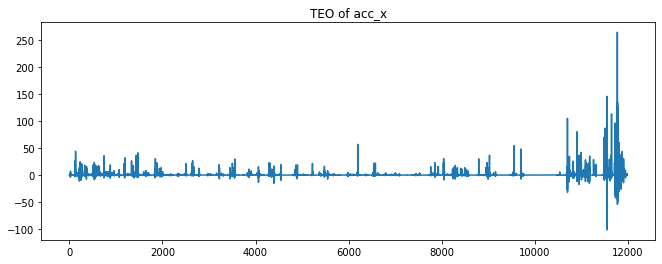

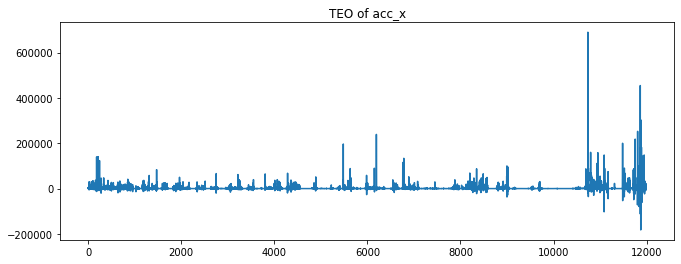

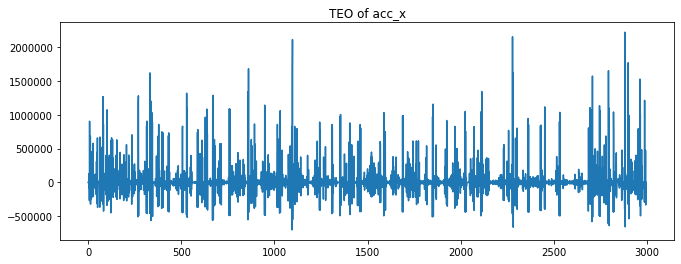

In [93]:
plt.figure(figsize=(11,4))
plt.title('TEO of acc_x')
plt.plot(teo(acc_x))
plt.show()
plt.figure(figsize=(11,4))
plt.title('TEO of acc_x')
plt.plot(teo(gyr_x))
plt.show()
plt.figure(figsize=(11,4))
plt.title('TEO of acc_x')
plt.plot(teo(hrm))
plt.show()

# <b>2.3:</b>

In [94]:
def gaborfilt(signal,fc,a,fs):
    Wc = 2*np.pi*fc/fs
    b = a/fs
    N = int((3/b)+1)
    n = np.linspace(-N,N,2*N + 1) # -N <= n <= N
    h = np.exp((-1*b**2)*(n**2))*np.cos(Wc*n)
    z = sc.signal.lfilter(h,1,signal)#[:, len(h) - 1:]
    return z

In [95]:
npzfile = np.load('signals/step_00.npz')
a=20/50
fcmin=a/2
fcmax=(20-a)/2
f1=np.linspace(fcmin,fcmax,25)

In [96]:
x = np.empty((25,11992))
for i in range(0,25):
    x[i,:] = gaborfilt(npzfile['acc'][:,0],f1[i],20/50,20)  
    
y = np.empty((25,11992))
for i in range(0,25):
    y[i,:] = gaborfilt(npzfile['gyr'][:,0],f1[i],20/50,20)

In [97]:
a=5/50
fcmin=a/2
fcmax=(5-a)/2
f2=np.linspace(fcmin,fcmax,25)
z=np.empty((25,2998))

for i in range(0,25):
    z[i,:] = gaborfilt(npzfile['hrm'],f2[i],5/50,5)

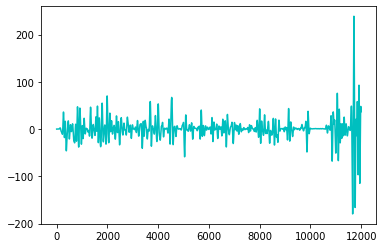

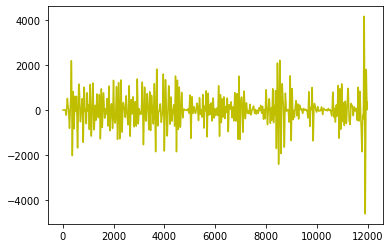

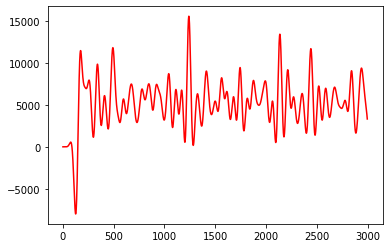

In [98]:
for i in range(0,1):
    plt.plot(x[i],color='c')
    plt.show()
    plt.plot(y[i],color='y')
    plt.show()
    plt.plot(z[i],color='r')
    plt.show()    

# <b>2.4:</b>

In [99]:
def filter_sig(signal):
    return sc.signal.lfilter([0.25,0.5,0.25],1,signal)

# <b>2.5:</b>

<i>Στην συγκεκριμένη περίπτωση θέλουμε 400 δείγματα και ανά 100 νέο παράθυρο. Συνεπώς θα έχουμε 
$N = (12000-400)/100 + 1 = 117$ παράθυρα. Eπίσης, στο τέλος του κάθε σήματος κάνουμε zero padding </br>
    προκειμένου να έχουμε μήκος σήματος ίσο με 12000. </br>
Ομοίως, για την περίπτωση του σήματος hrm, έχουμε 200 δείγματα και ανά 50 νέο παράθυρο. Άρα έχουμε </br>
    συνολικά $ N = 57$ παράθυρα. </i>

In [100]:
def analysis(signal):
    j=0
    if len(signal) == 12000:
        a = 117
        b = 400
        step = 100
        window = np.empty((a,b))
    else:
        a = 57
        b = 200
        step = 50
        window = np.empty((a,b))
        
    window[a-1,:] = signal[len(signal)-b:len(signal)]*np.hamming(b)
    for i in range(0,(len(signal)-b),step):
        window[j,:]=signal[i:i+b]*np.hamming(b)
        j=j+1
    return window

In [101]:
accx = np.pad(npzfile['acc'][:,0], (0,8), 'constant') 
gyrx= np.pad(npzfile['gyr'][:,0], (0,8), 'constant') 
hrm = np.pad(npzfile['hrm'], (0,2), 'constant') 

* <i> Τα παραθυρωμένα σήματα είναι τα εξής:

In [102]:
win_accx = analysis(accx)
win_gyrx = analysis(gyrx)
win_hrm = analysis(hrm)

# <b>2.6:</b>

* <i> Για τα σήματα acc και gyr:

In [103]:
fs = 20
a = fs/50
fcmin = a/2
fcmax = (fs-a)/2
fc = np.linspace(fcmin,fcmax,25)
Filter_acc = np.empty((117,25,400))
Filter_gyr = np.empty((117,25,400))

In [104]:
for i in range(117):
    for j in range(25):
        Filter_acc[i,j,:] = gaborfilt(win_accx[i,:], fc[j], a, fs)
        
for i in range(117):
    for j in range(25):
        Filter_gyr[i,j,:] = gaborfilt(win_gyrx[i,:], fc[j], a, fs)

* <i> Για το σήμα hrm:

In [105]:
fs = 5
a = fs/50
fcmin = a/2
fcmax = (fs-a)/2
fc = np.linspace(fcmin,fcmax,25)
Filter_hrm = np.empty((57,25,200))

In [106]:
for i in range(57):
    for j in range(25):
        Filter_hrm[i,j,:] = gaborfilt(win_hrm[i,:], fc[j], a, fs)

# <b>2.7:</b>
### <b>(α΄)</b>

In [110]:
teo_acc = np.empty((117,25,398))
teo_gyr = np.empty((117,25,398))
teo_hrm = np.empty((57,25,198))
for i in range (25):
    for j in range(117):
        teo_acc[j,i,:] = teo(Filter_acc[j,i,:])
        teo_gyr[j,i,:] = teo(Filter_gyr[j,i,:])

for i in range (25):
    for j in range(57):
        teo_hrm[j,i,:]=teo(Filter_hrm[j,i,:])

### <b>(β΄)</b>

In [113]:
bino_acc=np.empty((117,25,398))
bino_gyr=np.empty((117,25,398))  
bino_hrm=np.empty((57,25,198))

In [114]:
for i in range (25):
    for j in range(117):
        bino_acc[j,i,:] = filter_sig(filter_sig(teo_acc[j,i,:]))
        bino_gyr[j,i,:] = filter_sig(filter_sig(teo_gyr[j,i,:]))
        
for i in range (25):
    for j in range(57):
        bino_hrm[j,i,:] = filter_sig(filter_sig(teo_hrm[j,i,:]))

### <b>(γ΄)</b>

In [115]:
average_en_acc = np.empty((117,25))
average_en_gyr = np.empty((117,25))
average_en_hrm = np.empty((57,25))

for i in range (25):
    for j in range(117):
        average_en_acc[j,i] = sum((bino_acc[j,i,:])[bino_acc[j,i,:]>0])/len((bino_acc[j,i,:])[bino_acc[j,i,:]>0])
        average_en_gyr[j,i] = sum((bino_gyr[j,i,:])[bino_gyr[j,i,:]>0])/len((bino_gyr[j,i,:])[bino_gyr[j,i,:]>0])
        
for i in range (25):
    for j in range(57):        
        average_en_hrm[j,i] = sum((bino_hrm[j,i,:])[bino_hrm[j,i,:]>0])/len((bino_hrm[j,i,:])[bino_hrm[j,i,:]>0])
        

### <b>(δ΄)</b>

In [116]:
max_av_en_acc = np.empty(117)
max_av_en_gyr = np.empty(117)
max_av_en_hrm = np.empty(57)

for i in range (117):
    max_av_en_acc[i] = max(average_en_acc[i,:])
    max_av_en_gyr[i] = max(average_en_gyr[i,:])
    
for i in range(57):
    max_av_en_hrm[i] = max(average_en_hrm[i,:])

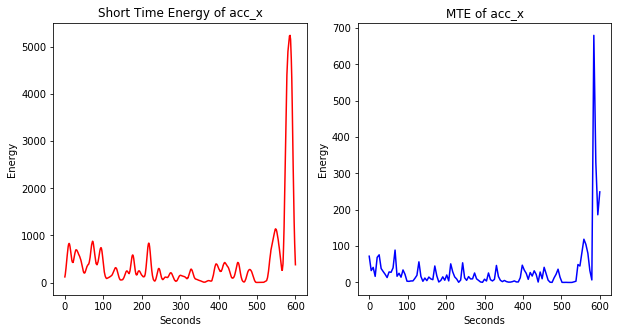

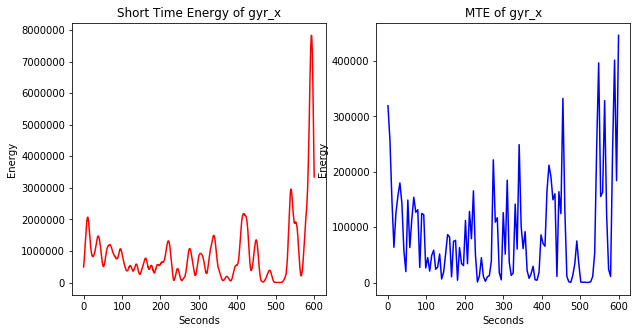

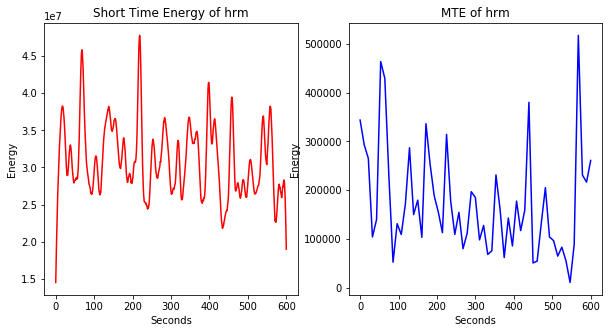

In [138]:
tacc_gyr = np.linspace(0,600,11992)
t_hrm = np.linspace(0,600,2998)
samples = np.linspace(0,600,117)
hrm_samples = np.linspace(0,600,57)
n = np.linspace(0,600,11992)

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.xlabel('Seconds')
plt.ylabel('Energy')
plt.title('Short Time Energy of acc_x')
plt.plot(n,ste(npzfile['acc'][:,0],20),"-r")
plt.subplot(122)
plt.xlabel('Seconds')
plt.ylabel('Energy')
plt.title("ΜΤΕ of acc_x")
plt.plot(samples,max_av_en_acc,"-b")
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.xlabel('Seconds')
plt.ylabel('Energy')
plt.title('Short Time Energy of gyr_x')
plt.plot(n,ste(npzfile['gyr'][:,0],20),color = 'r', label = "Βραχέος Χρόνου")
plt.subplot(122)
plt.title("ΜΤΕ of gyr_x")
plt.xlabel('Seconds')
plt.ylabel('Energy')
plt.plot(samples,max_av_en_gyr,color = 'b', label = "ΜΤΕ")
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.xlabel('Seconds')
plt.ylabel('Energy')
plt.title('Short Time Energy of hrm')
plt.plot(t_hrm,ste(npzfile['hrm'],5),color = 'r', label = "Βραχέος Χρόνου")
plt.subplot(122)
plt.xlabel('Seconds')
plt.ylabel('Energy')
plt.title("ΜΤΕ of hrm")
plt.plot(hrm_samples,max_av_en_hrm,color = 'b', label = "ΜΤΕ")
plt.show()

Παρατηρώντας τα παραπάνω γραφήματα είναι φανερό ότι έχουν μεγάλη ομοιότητα μεταξύ τους. Στα διαγράμματα ΜΤΕ υπάρχει αποθορυβοποίηση του σήματος, το οποίο ήταν αναμενόμενο, αφού επεξεργαζόμαστε το σήμα και το φιλτράρουμε. Τέλος, τα σηματνικά μέρη της κάθε πληροφορίας είναι εμφανή σε κάθε γράφημα αντίστοιχα.

<h1><b><i><center>Μέρος 3ο - Εξαγωγή χαρακτηριστικών, Ανάλυση Πρωτευουσών Συνιστω-σών μεPCA  (Principal  Component  Analysis), και Συσταδοποίηση τους μετον ΑλγόριθμοK-means</center></i></b><h1>
    <b>3.1:</b>

<i> Για να διαβάσουμε όλα τα αρχεία χωρίς να τα γράφουμε με το χέρι, κάνουμε το παρακάτω for. Στο τέλος έχουμε αποθυκεύσει όλα τα σήματα στο πίνακα signals. Το κάθε στοιχείο του περιέχει τα 3 σήματα acc,gyr (και τους 3 άξονες) και το hrm, δηλαδή συνολικά 7.

In [40]:
import os
npzfiles = os.listdir("C:\\Users\\Antreas\\Documents\\signals")
signals = []
for i in npzfiles: 
    x = np.load("C:\\Users\\Antreas\\Documents\\signals\\"+i)
    file = []
    y = x['acc'][:,0]
    file.append(y) 
    y = x['acc'][:,1]
    file.append(y) 
    y = x['acc'][:,2]
    file.append(y)
    y = x['gyr'][:,0]
    file.append(y)
    y = x['gyr'][:,1]
    file.append(y)
    y = x['gyr'][:,2]
    file.append(y)
    y = x['hrm']
    file.append(y)
    signals.append(file)

In [74]:
Ste = []
Teo = []
chars_Ste = []
chars_Teo = []
Fs = [20,20,20,20,20,20,5] #Όλα τα σήματα έχουν fs=20 εκτός από το hrm που έχει fs=5

for i in range(40):
    for j in range(7):
        Ste.append(ste(list(signals[i][j][:]),Fs[j]))
        Teo.append(teo(list(signals[i][j][:])))
        
for i in range(40):
    for j in range(7):
        chars_Ste.append(calculate(Ste[i*7 + j]))
        chars_Teo.append(calculate(Teo[i*7 + j]))

In [125]:
chars_ste = np.array(chars_Ste)
chars_ste = chars_ste.reshape(40,28)
chars_teo = np.array(chars_Teo)
chars_teo = chars_teo.reshape(40,28)


chars = np.concatenate((chars_ste, chars_teo),axis=1)
for i in range(1): #Supposed to be in range(40) to print all chars
                   #For simplisity I only print the first file
    print('Statistics for step_', i+1, ' and sleep_', i+1, sep = '')
    print('{:<22s}{:<21s}{:<21s}{:<20s}'.format('mean','min','max','std'))
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:<20f}'.format}, linewidth=100):
        print(chars[i,:])
    print( '\n')

Statistics for step_1 and sleep_1
mean                  min                  max                  std                 
[2.129128             0.066613             90.889651            10.311250
 0.835389             0.065892             36.644117            4.150999
 1.566829             0.156982             63.292769            7.156269
 1208.700120          4.845794             66018.123949         7503.314884
 126.437864           7.440040             5524.943037          628.074492
 67.890428            2.031159             3253.497738          370.478680
 51418117.054479      27305865.996154      61643692.018855      3396656.418309
 0.003339             -1.273471            12.661674            0.129853
 0.002044             -1.106496            1.896420             0.038720
 0.003339             -1.459134            10.442049            0.112719
 1.634218             -13345.199035        20924.100717         240.669546
 0.199935             -58.471740           368.558400         

# <b>3.2:</b> 
# (α΄)

In [88]:
Chars = chars - np.mean(chars, axis = 0)
u,s,vh = np.linalg.svd(Chars, full_matrices=False, compute_uv=True, hermitian=False)
lk = np.empty(40)
for i in range(40):
    lk[i] = (s[i]*s[i])/40
print(vh)

[[-3.04830614e-05 -2.38003957e-07 -1.25839410e-04 ...  5.30792607e-03
  -2.41240453e-02 -3.92333192e-03]
 [ 2.92408807e-05  3.16085830e-06  9.65960757e-05 ... -1.41693123e-02
   2.81360357e-02  3.65166655e-03]
 [-1.07081437e-04 -1.65427777e-06 -3.56394707e-04 ...  2.01412164e-02
  -2.54323466e-02 -3.20542519e-03]
 ...
 [-1.80777852e-01 -2.66649211e-01 -2.03866831e-02 ... -4.66618055e-05
  -1.91682257e-05 -1.06152074e-03]
 [-1.95310033e-01 -7.76402303e-02 -6.28926432e-02 ...  9.71159147e-06
   7.69831818e-06 -2.01788864e-04]
 [ 2.67603383e-02 -7.86549466e-01  4.64869534e-04 ...  1.70675001e-05
   8.36487295e-06  1.49584244e-04]]


# (β΄):

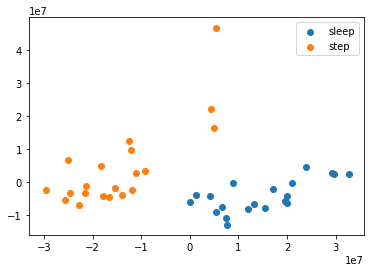

In [124]:
v = vh.transpose()
yout= np.dot(Chars ,v)
plt.scatter(yout[0:20,0], yout[0:20,1], label = 'sleep')
plt.scatter(yout[20:40,0], yout[20:40,1], label = 'step')
plt.legend()
plt.show()

<h1><b><i><center>Μέρος 4ο - Αποθορυβοποίηση σημάτων κινήσης με φίλτρα Butterworth και Wiener</center></i></b><h1>
<b>4.1:</b>

In [142]:
sleep_01 = np.load('signals/sleep_01.npz')
sleep_01.files

['acc', 'gyr', 'hrm']

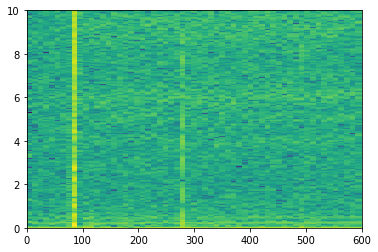

In [143]:
acc = sleep_01['acc']
acc_y = acc[:,1]
STFT1 = lb.core.stft(np.array(acc_y),2048,200,400)
b = np.shape(STFT1)  

t = np.linspace(0,600,b[1])
f = np.linspace(0,10,b[0])

plt.pcolormesh(t,f,np.log(np.abs(STFT1)))
plt.show()

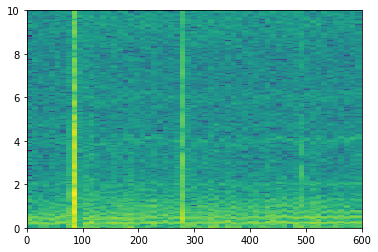

In [144]:
gyr = sleep_01['gyr']
gyr_y = gyr[:,1]
STFT2 = lb.core.stft(np.array(gyr_y),2048,200,400)

b = np.shape(STFT2)  

t = np.linspace(0,600,b[1])
f = np.linspace(0,10,b[0])

stft2 = np.log(np.abs(STFT2))
plt.pcolormesh(t,f,stft2)
plt.show()

Από τα παραπάνω γραφήματα, παρατηρούμε ότι μεγαλύτερο μέρος του φάσματος καταλαμβάνεται από μικρά πλάτη. Αυτό οφείλεται στο θόρυβο των συστημάτων του επιταχυνσιόμετρου και του γυροσκοπίου.

# <b>4.2:</b>

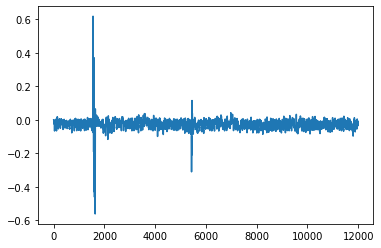

In [145]:
#fmin noise = 2Hz
#0-10Hz
B = sc.signal.butter(5, 0.2, 'lowpass', output = 'sos')
acc_y_filtered = sc.signal.sosfilt(B,acc_y)
plt.plot(acc_y_filtered)
plt.show()

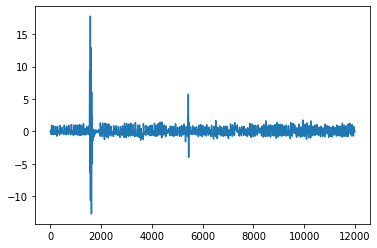

In [146]:
gyr_y_filtered = sc.signal.sosfilt(B,gyr_y)
plt.plot(gyr_y_filtered)
plt.show()

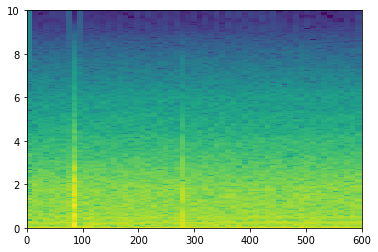

In [147]:
stft_acc_y_filtered = lb.core.stft(np.array(acc_y_filtered),2048,200,400)

b = np.shape(stft_acc_y_filtered)  

t = np.linspace(0,600,b[1])
f = np.linspace(0,10,b[0])

temp = np.log(np.abs(stft_acc_y_filtered))
plt.pcolormesh(t,f,temp)
plt.show()

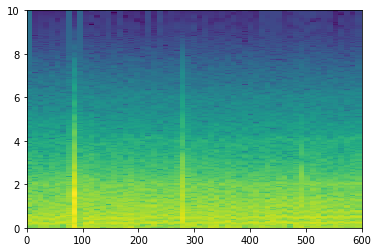

In [148]:
stft_gyr_y_filtered = lb.core.stft(np.array(gyr_y_filtered),2048,200,400)

b = np.shape(stft_gyr_y_filtered)  

t = np.linspace(0,600,b[1])
f = np.linspace(0,10,b[0])

temp2 = np.log(np.abs(stft_gyr_y_filtered))
plt.pcolormesh(t,f,temp2)
plt.show()

# <b>4.3:</b>

In [149]:
def Wiener(sig, time):    #sig = the signal we want to filter
    fs = 20                 #time = the moment that the person stands still
    Ts = 1/fs
    sig_p = np.pad(sig,(0,8),'constant')
    
    standing = sig[time:time+400]     #cutting a window of the signal to calculate Pu
    N = 400
    dft_standing = np.fft.fft(standing,N)
    Pu = abs(dft_standing**2)/N
    
    w = sc.signal.get_window("boxcar", 400, 'true')
    number_of_windows = len(sig_p)//N
    
    windowed = []    
    for i in range(number_of_windows):
        temp = (sig_p[i*400:(i+1)*400])*w
        windowed.append(temp)    #save the widnows in an array
        
    Px = []    
    for i in range(number_of_windows):
        temp = np.fft.fft(windowed[i]) #fourier transform the windows
        temp = abs(temp**2)/N          #Calculate Px
        Px.append(temp)                #Store it in an array
        
    Pd = []    
    for i in range(number_of_windows):
        temp = Px[i] - Pu            #Calculate Pd = Px - Pu
        Pd.append(temp)              #Store it in an array
        
    for i in range((number_of_windows)):
        for j in range(len(Pd[i])):
            if Pd[i][j]<0:
                Pd[i][j] = 0
                
    H = []
    for i in range(len(Pd)):
        temp = Pd[i]/(Pd[i] + Pu)   #Calculating H
        H.append(temp)
    
    win = np.fft.fft(windowed)      #Παράθυρα χωρίς επικάλυψη
    wiener_signal = []
    for i in range(0,len(H)):
        temp = win[i] * H[i]        #Wiener filtering each window
        wiener_signal.append(temp)
        
    tot = []
    for i in range(len(wiener_signal)):
        temp = np.fft.ifft(wiener_signal[i])
        tot.append(temp)
        
    final_sig = np.real(np.concatenate(tot))    #create as one list and make it real
    
    plt.figure(2,dpi = 80,figsize = (10.0, 4.0))
    tw = np.arange(0,len(final_sig)*Ts, Ts)
    plt.title("Wiener Filtered")
    plt.plot(tw,sig_p,label = "Original signal")
    plt.plot(tw,final_sig,label = "Filtered signal")
    plt.legend()
    plt.show()

* Για το acc_y

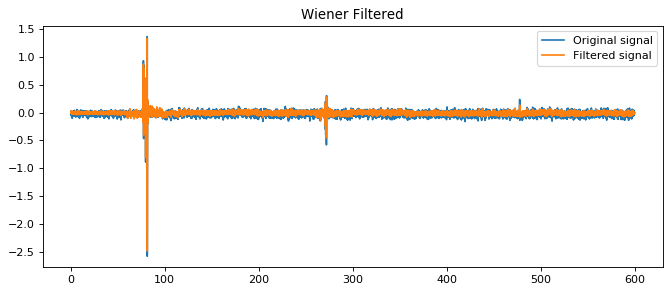

In [150]:
Wiener(acc_y,3000)

* Για το gyr_y

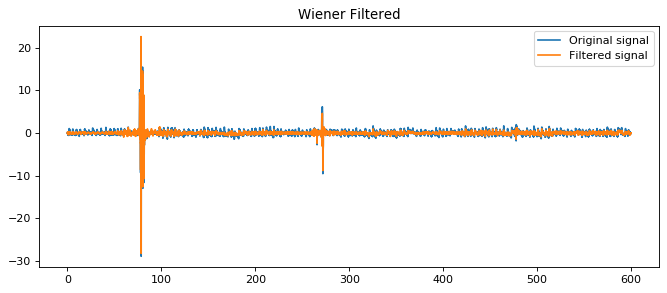

In [151]:
Wiener(gyr_y,3000)

# <b>4.4:</b>

In [105]:
def Butt(sig):
    fs = 20
    Ts = 1/fs
    Butt = sc.signal.butter(5, 0.2, 'lowpass', output = 'sos')
    filtered_sig = sc.signal.sosfilt(Butt,sig)    #Butterworth filtering the signal
    time = np.arange(0,len(filtered_sig)*Ts,Ts)
    plt.figure(2,dpi = 80,figsize = (10.0, 5.0))
    plt.plot(time, sig, label = "Initial Signal")
    plt.plot(time, filtered_sig, label = "Filtered Signal")
    plt.title("Butterworth Filtered")
    plt.legend()
    plt.show

* Filtering <i>step_07.npz

In [106]:
step_07 = np.load('signals/step_07.npz')
step_07_x = step_07['acc'][:,0]

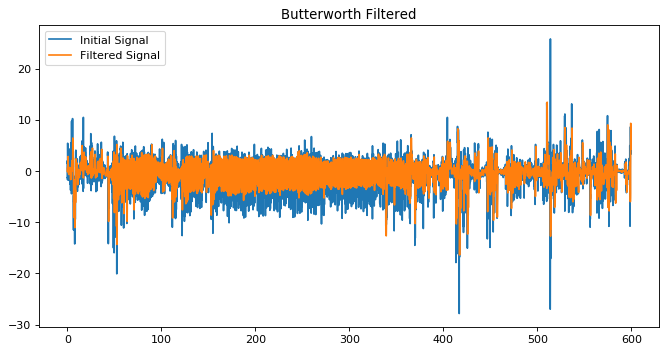

In [107]:
Butt(step_07_x)

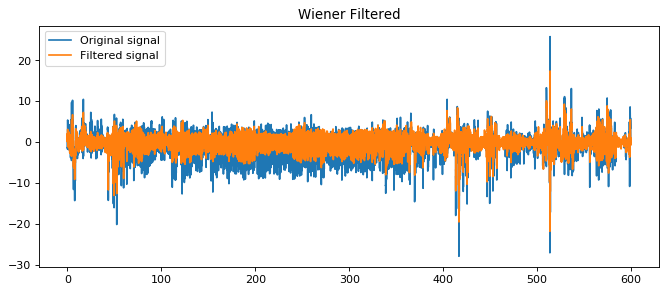

In [108]:
Wiener(step_07_x,3000)

* Filtering <i>step_08.npz

In [109]:
step_08 = np.load('signals/step_08.npz')
step_08_x = step_08['acc'][:,0]

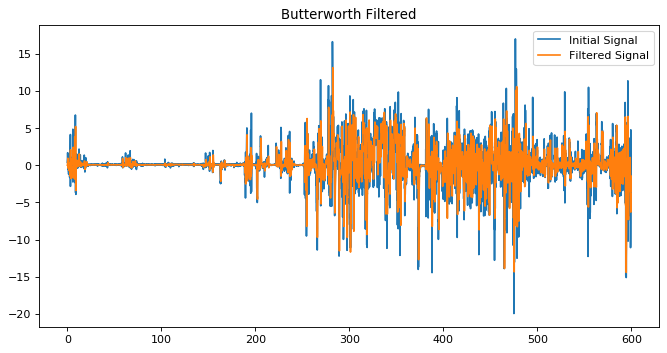

In [110]:
Butt(step_08_x)

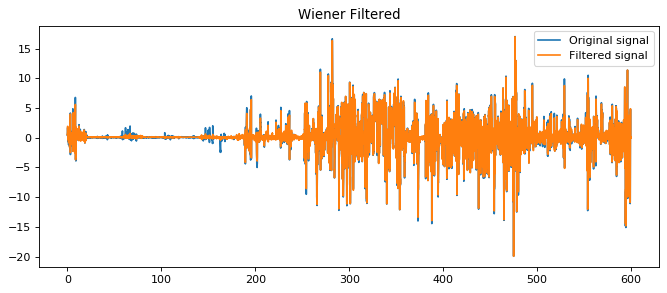

In [111]:
Wiener(step_08_x,3000)

* Filtering <i>sleep_07.npz

In [112]:
sleep_07 = np.load('signals/sleep_07.npz')
sleep_07_x = sleep_07['acc'][:,0]

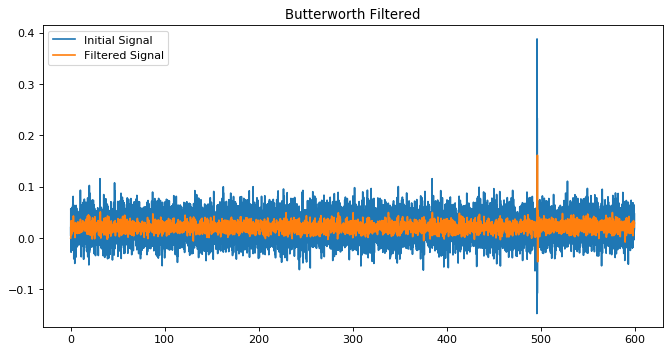

In [113]:
Butt(sleep_07_x)

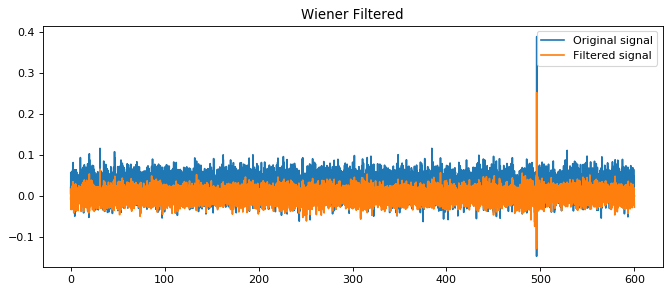

In [114]:
Wiener(sleep_07_x,3000)

* Filtering <i>sleep_05.npz

In [115]:
sleep_05 = np.load('signals/sleep_05.npz')
sleep_05_x = sleep_05['acc'][:,0]

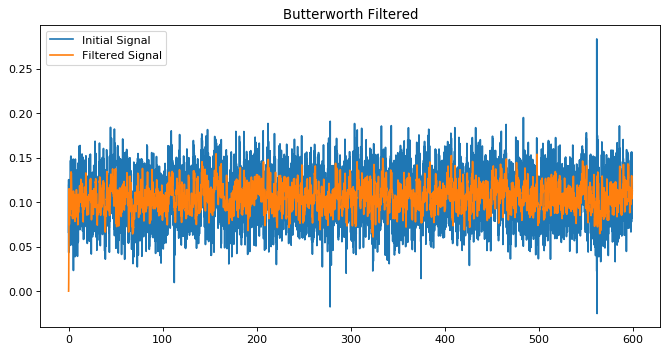

In [116]:
Butt(sleep_05_x)

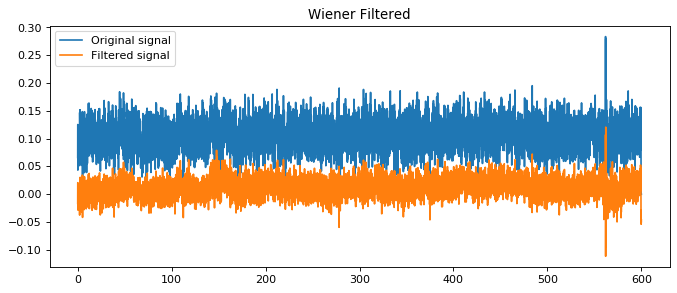

In [120]:
Wiener(sleep_05_x,1000)